C:\Users\LENOVO-RKC\AppData\Local\Temp\ipykernel_8348\3377975127.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df['Sales'].resample('M').sum().dropna()
C:\Users\LENOVO-RKC\AppData\Local\Temp\ipykernel_8348\3377975127.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=ts.index[-1], periods=future_steps + 1, freq="M")[1:]


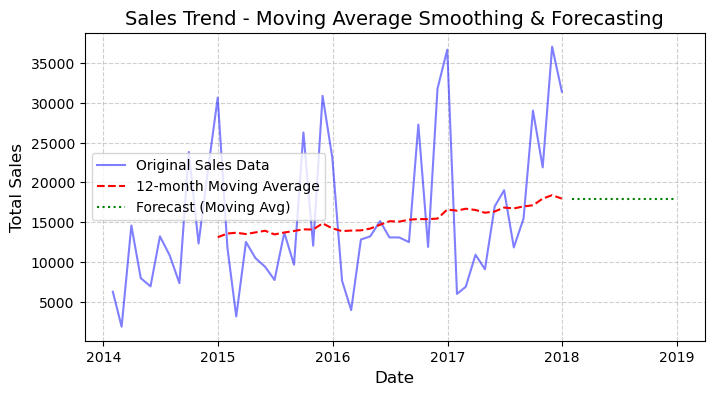

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/LENOVO-RKC/OneDrive/Desktop/Super_Store_data.csv"  # Update with correct path
df = pd.read_csv(file_path, encoding="latin1")

# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Convert 'Order Date' to datetime & set as index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

# Ensure 'Sales' column exists
if "Sales" not in df.columns:
    raise ValueError("Column 'Sales' not found in dataset.")

# Convert 'Sales' to numeric (handle errors)
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Resample Sales data to Monthly Frequency (Sum of Sales per month)
ts = df['Sales'].resample('M').sum().dropna()

# Apply Moving Average Smoothing
window_size = 12  # 12-month moving average
moving_avg = ts.rolling(window=window_size).mean()

# Forecasting using Moving Average
future_steps = 12  # Forecast for next 12 months
forecast_values = moving_avg.iloc[-1]  # Last smoothed value as a baseline forecast
future_dates = pd.date_range(start=ts.index[-1], periods=future_steps + 1, freq="M")[1:]
forecast_series = pd.Series([forecast_values] * future_steps, index=future_dates)

# Plot Original, Smoothed & Forecasted Sales
plt.figure(figsize=(8, 4))
plt.plot(ts, label="Original Sales Data", alpha=0.5, color='blue')
plt.plot(moving_avg, label=f"{window_size}-month Moving Average", color="red", linestyle="dashed")
plt.plot(forecast_series, label="Forecast (Moving Avg)", color="green", linestyle="dotted")

plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Sales Trend - Moving Average Smoothing & Forecasting", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
